# EDA this Data and Ready For ML Model


In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
data= pd.read_csv("/content/heart failure - heart failure.csv")

In [220]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Check Null Value**

In [221]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# define Feature and Target

In [222]:
x=data.drop("DEATH_EVENT",axis=1)
y=data[["DEATH_EVENT"]]

In [223]:
x.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6


In [224]:
y.head(2)

,DEATH_EVENT
0,1
1,1


# Find Correlation Between feature and Target

In [225]:
corr_matrix= data.corr()
corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


**Using correlation Heatmap**

<Axes: >

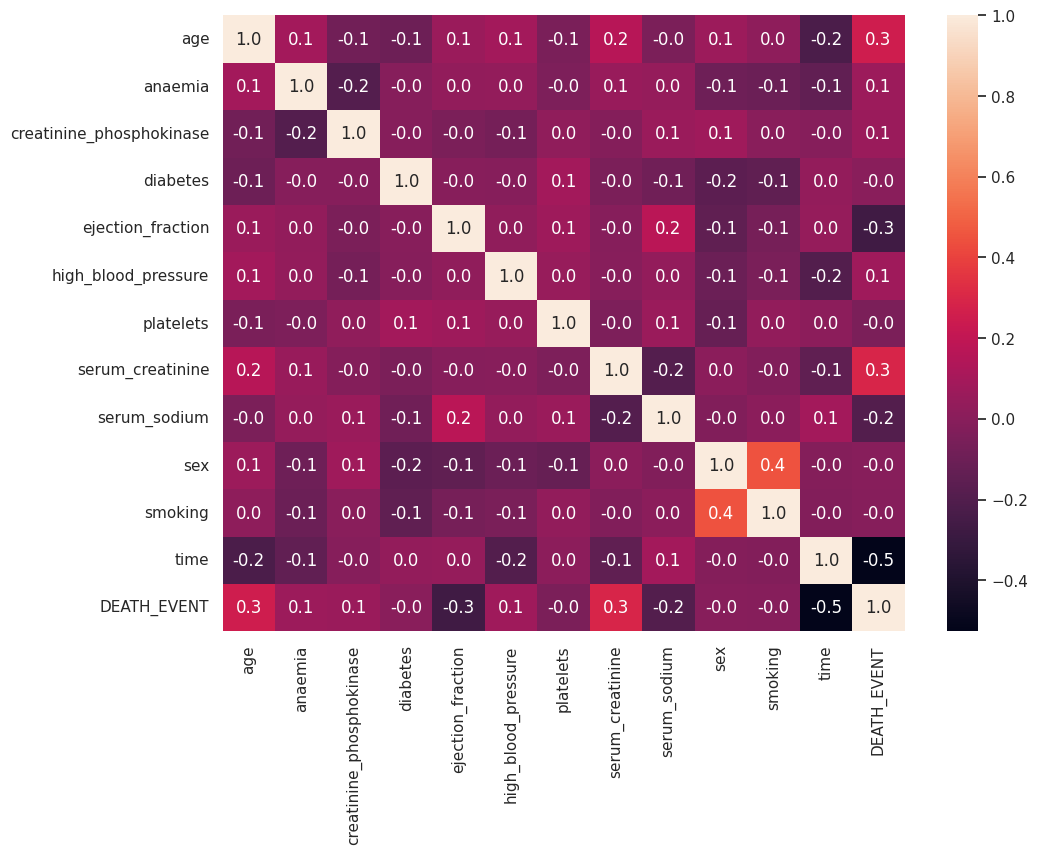

In [226]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(corr_matrix,robust=False,annot=True,fmt=".1f")

# Analysis EDA

In [227]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [228]:
data["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

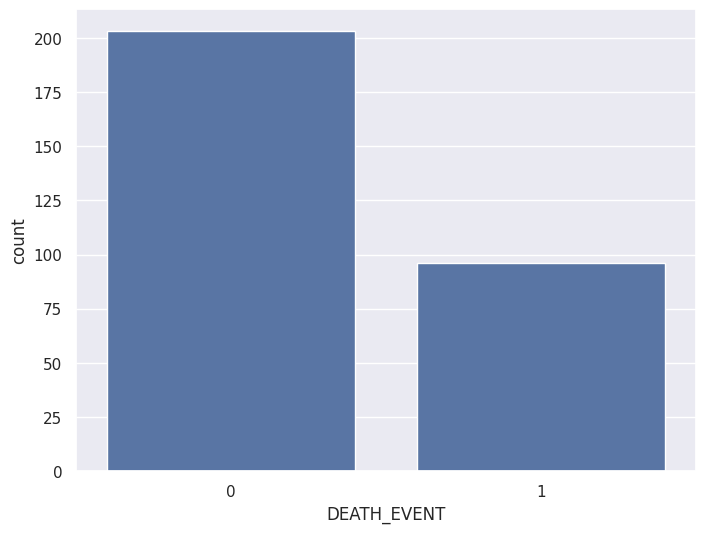

In [229]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x="DEATH_EVENT",data=data)

In [230]:
data["diabetes"].value_counts()

diabetes
0    174
1    125
Name: count, dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

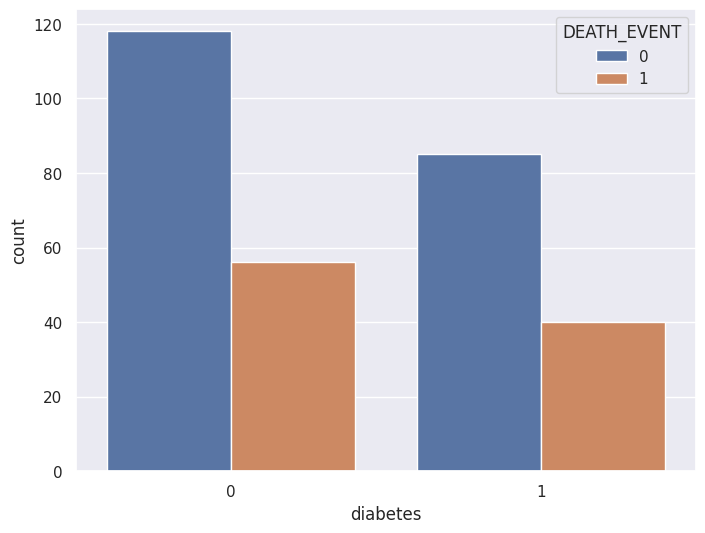

In [231]:
sns.countplot(x="diabetes",data=data,hue="DEATH_EVENT")

In [232]:
data["high_blood_pressure"].value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

<Axes: xlabel='high_blood_pressure', ylabel='count'>

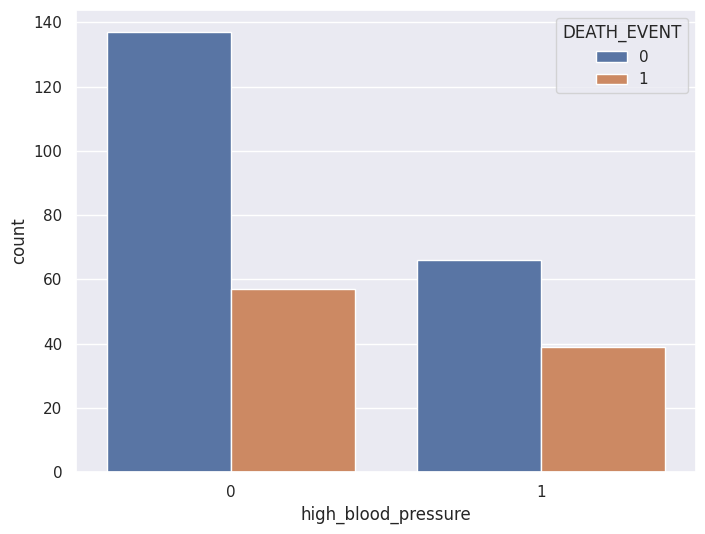

In [233]:
sns.countplot(x="high_blood_pressure",data=data,hue="DEATH_EVENT")

In [234]:
data["smoking"].value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='smoking', ylabel='count'>

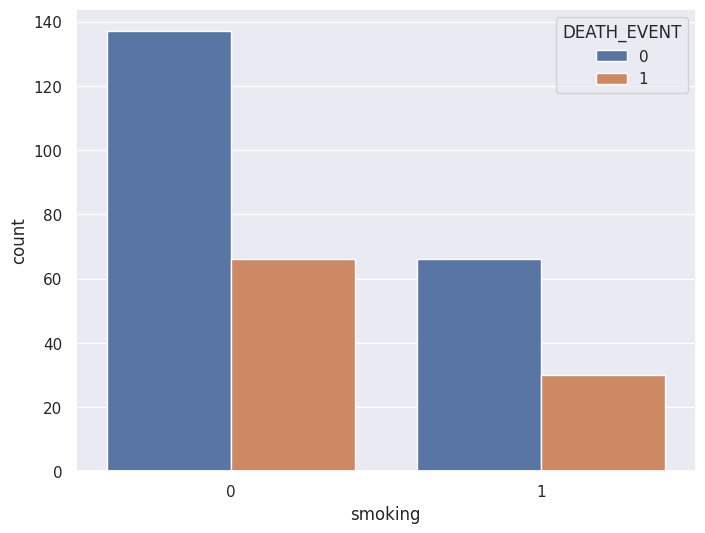

In [235]:
sns.countplot(x="smoking",data=data,hue="DEATH_EVENT")

# Split Train and Test Data

In [236]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [237]:
x_train.shape

(209, 12)

In [238]:
x_test.shape

(90, 12)

In [239]:
y_train.shape

(209, 1)

In [240]:
y_test.shape

(90, 1)

# Calling Sklearn Model

In [241]:
from sklearn.tree import DecisionTreeClassifier

In [242]:
make=DecisionTreeClassifier()

In [243]:
make.fit(x_train,y_train)

DecisionTreeClassifier()

In [244]:
pred_train_value=make.predict(x_train)

In [245]:
make.score(x_train,y_train)

1.0

#Check by Test value

In [246]:
pred_test_value=make.predict(x_test)

In [247]:
make.score(x_test,y_test)

0.7111111111111111

# Test Accuray,precision and recall value using library function

In [248]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,roc_curve,roc_auc_score,RocCurveDisplay

**Accuracy score value**

In [249]:
accuracy_score(y_test,pred_test_value)

0.7111111111111111

**Precision score**

In [250]:
precision_score(y_test,pred_test_value)

0.6666666666666666

**Recall Score**

In [251]:
recall_score(y_test,pred_test_value)

0.5945945945945946

**F1 score**

In [252]:
f1_score(y_test,pred_test_value)

0.6285714285714286

**Confusion matrix value**

In [253]:
confusion_matrix(y_test,pred_test_value)

array([[42, 11],
       [15, 22]])

<Axes: >

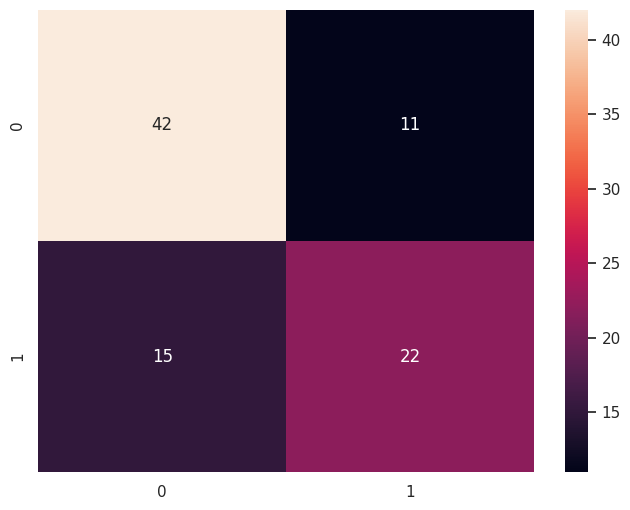

In [254]:
sns.heatmap(confusion_matrix(y_test,pred_test_value),annot=True)

**Classification Report**

In [255]:
print(classification_report(y_test,pred_test_value))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        53
           1       0.67      0.59      0.63        37

    accuracy                           0.71        90
   macro avg       0.70      0.69      0.70        90
weighted avg       0.71      0.71      0.71        90



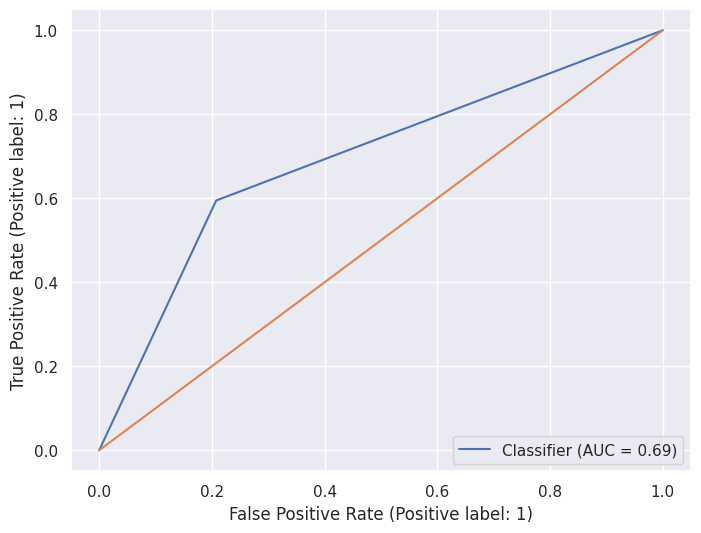

In [256]:
RocCurveDisplay.from_predictions(y_test,pred_test_value)
plt.plot([0,1],[0,1])
plt.show()

In [257]:
roc_auc_score(y_test,pred_test_value)

0.693523712391637

In [258]:
roc_curve(y_test,pred_test_value)

(array([0.        , 0.20754717, 1.        ]),
 array([0.        , 0.59459459, 1.        ]),
 array([2, 1, 0]))